# Will's Method

Looking at how the HU in the ring we created changes relative to the whole tumour volume

In [2]:
# Import packages and functions

import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def inforeader(folderpath):
    peaksfolder = folderpath
    peaks_file_names=[]
    for folder, subs, files in os.walk(peaksfolder):
        for filename in files:
            peaks_file_names.append(os.path.abspath(os.path.join(folder, filename)))

    myorder = [3,4,5,6,7,0,1,2]
    peaks_file_names = [ peaks_file_names[i] for i in myorder]
    #print(peaks_file_names)
    j=0
    peaksinfo = []
    while j<len(peaks_file_names):
        with open(peaks_file_names[j],"r") as file:
            datamatrix = []
            for line in file:
                templine = []
                line.replace("\n","")
                bit = line.split(",")
                for element in bit:
                    templine.append(element)
                templine = templine[:-1]
                for element in templine:
                    element = float(element)
                datamatrix.append(templine)


            peaksinfo.append(datamatrix)
        j+=1

    return peaksinfo

In [3]:
# Load up all of our time data for each patient

timefile = "D:/allCSV/scantimes.csv"

with open(timefile,"r") as file:
    datamatrix = []
    for line in file:
        templine = []
        #line.replace("\n","")
        bit = line.split(",")
        datamatrix.append([str(bit[0]),str(bit[1]),
                         str(bit[2]),str(bit[3]),str(bit[4]),
                           str(bit[5]),str(bit[6]),
                           str(bit[7].replace('\n',''))])
        
#print(datamatrix)

In [4]:
# Create dataframe for each patient with which to store all of our data

df = {'N01':[[],[]],
     'N02':[[],[]],
     'N05':[[],[]],
     'N06':[[],[]],
     'N07':[[],[]],
     'N10':[[],[]],
     'N11':[[],[]],
     'N16':[[],[]]
     }


# Append all time information to first list in each patient entry
for element in datamatrix:
    if datamatrix.index(element) in range(0,8):
        df[element[0]][0]=element[1:]
    

In [5]:
# Load in all information we had before from within the annular masks
# and whole masks using defined function "inforeader" to read in 
# the csv files of the Gaussian info we created.

ringfolder = "D:/allCSV/ring"
ringmatrix = inforeader(ringfolder)

wholefolder = "D:/allCSV/whole"
wholematrix = inforeader(wholefolder)

In [6]:
ringtumourpeaks = [[float(entry[3]) for entry in patient] for patient in ringmatrix] 
wholetumourpeaks = [[float(entry[3]) for entry in patient] for patient in wholematrix]
print(ringtumourpeaks)
print(wholetumourpeaks)

[[271.453237605, 242.894556915, 286.410642183, 243.027191065, 274.575642551, 265.745201488], [40.7111734888, 56.5516487373, 105.648420488, 63.5291913871, 40.3945108693, 64.9515176139], [724.59519481, 703.298649377, 921.344104222, 866.971676553, 823.244589333, 848.238978784], [40.3704709938, 99.2982142602, 64.4781230649, 56.5185079935, 105.79054184], [2000.0, 2000.0, 2000.0, 2000.0, 1292.44134149, 10.0, 2000.0], [315.006373501, 315.006373501, 315.006373501, 306.226549798, 336.926848995, 290.512204139], [1516.24859356, 1680.49802619, 1623.00887773, 1568.70673964], [196.192155929, 343.065347198, 404.048826403, 283.22701723, 391.483148255]]
[[670.993166364, 629.259492309, 742.465453208, 496.20508523, 651.543197548, 583.994973052], [28.7298755265, 62.9060781318, 91.8788632913, 58.4362649533, 43.8735771501, 81.2633448413], [1560.32414603, 1338.28591466, 1678.07526539, 1721.06500466, 1404.20642821, 1621.00539301], [349.981751882, 365.785839335, 171.465870323, 273.460501588, 248.790863599], [8

In [7]:
i=0
relativepeaks = []
while i<len(ringtumourpeaks):
    templine = []
    j=0
    while j<len(ringtumourpeaks[i]):
        templine.append((wholetumourpeaks[i][0]*ringtumourpeaks[i][j])/(wholetumourpeaks[i][j]*ringtumourpeaks[i][0]))
        j+=1
    relativepeaks.append(templine)
    i+=1
    
print(relativepeaks)

[[1.0, 0.9541377492572133, 0.9535335353524584, 1.210644763665206, 1.041698083287768, 1.1248105830662594], [1.0, 0.6344140383321849, 0.8114607505344751, 0.7672042526127371, 0.6497397423355057, 0.5640462708070814], [1.0, 1.1316451224942514, 1.1823057580589842, 1.084743397053236, 1.2624590728980527, 1.1268163642094495], [1.0, 2.353402086925894, 3.259990114339194, 1.791751047349709, 3.6863281982943237], [1.0, 1.2729321680222705, 820.390679191, 0.9118640448275402, 0.734362540639842, 0.004557725995505555, 3.1591692392006028], [1.0, 1.0984912401217455, 1.092235211388296, 1.0776187824521488, 1.0695874031067196, 1.0130750938413593], [1.0, 1.1083261896021674, 1.0704108050773768, 1.034597325466818], [1.0, 1.2973440101962361, 1.4300008534212316, 1.5810213337424914, 1.645044010864258]]


In [8]:
df['N01'][1] = relativepeaks[0]
df['N02'][1] = relativepeaks[1]
df['N05'][1] = relativepeaks[2]
df['N06'][1] = relativepeaks[3]
df['N07'][1] = relativepeaks[4]
df['N10'][1] = relativepeaks[5]
df['N11'][1] = relativepeaks[6]
df['N16'][1] = relativepeaks[7]
df['N10'][1] = df['N10'][1][2:]
namearray = ['N01','N02','N05','N06','N07','N10','N11','N16']
anarray = []
i=0
while i<len(namearray):
    name = namearray[i]
    no_of_scans = len(df[name][1])
    templine = [df[name][0][0:no_of_scans], df[name][1]]
    for value in templine[0]:
        value = int(value)
    anarray.append(templine)
    i+=1

print(anarray)
def remove_values_from_list(the_list, val):
        while val in the_list:
            the_list.remove(val)
#for entry in anarray:
#    entry[0]=alist
#    alist = remove_values_from_list(alist,'')
#    entry[0] = [int(x) for x in alist]
#    entry[1] = entry[1][:len(entry[0])]

print(anarray)

[[['0', '2', '9', '16', '17', '22'], [1.0, 0.9541377492572133, 0.9535335353524584, 1.210644763665206, 1.041698083287768, 1.1248105830662594]], [['0', '3', '6', '10', '17', '23'], [1.0, 0.6344140383321849, 0.8114607505344751, 0.7672042526127371, 0.6497397423355057, 0.5640462708070814]], [['0', '7', '14', '21', '32', '38'], [1.0, 1.1316451224942514, 1.1823057580589842, 1.084743397053236, 1.2624590728980527, 1.1268163642094495]], [['0', '5', '13', '19', '26'], [1.0, 2.353402086925894, 3.259990114339194, 1.791751047349709, 3.6863281982943237]], [['0', '4', '11', '18', '25', '32', '35'], [1.0, 1.2729321680222705, 820.390679191, 0.9118640448275402, 0.734362540639842, 0.004557725995505555, 3.1591692392006028]], [['0', '7', '11', '18'], [1.092235211388296, 1.0776187824521488, 1.0695874031067196, 1.0130750938413593]], [['0', '7', '14', '21'], [1.0, 1.1083261896021674, 1.0704108050773768, 1.034597325466818]], [['0', '5', '6', '13', '15'], [1.0, 1.2973440101962361, 1.4300008534212316, 1.581021333

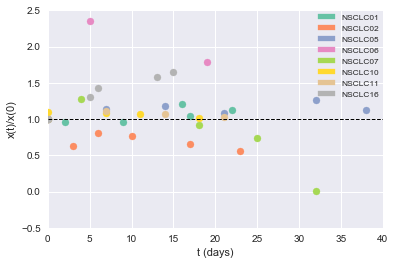

In [9]:
import matplotlib.patches as mpatches
sns.set()
colourlist = sns.color_palette("Set2", 10)
ziplist = [list(i) for i in zip(colourlist,namearray)]
newnamearray = ['NSCLC01','NSCLC02','NSCLC05','NSCLC06','NSCLC07','NSCLC10','NSCLC11','NSCLC16']
patcharray = [mpatches.Patch(color=colourlist[i], label=newnamearray[i]) for i in range(8)]
plt.subplots()
k=0
plt.xlim(0, 40)
plt.ylim(-0.5,2.5)
while k<(len(anarray)):
    #if k==5:
    #    anarray[k][1]=anarray[k][1][:-2]
    plt.scatter(x=np.array(anarray[k][0]),y=np.array(anarray[k][1]),color = colourlist[k])
    #plt.close()
    k+=1
xline = [list(np.linspace(0,40,40)), [1.0 for i in range(40)]]
plt.plot(xline[0], xline[1], linewidth=1, linestyle = '--',c='k')

plt.xlabel("t (days)")
plt.ylabel("x(t)/x(0)")

#plt.title("Plot 1: Showing how relative heights of histogram peaks\n for tumour vs healthy lung change with time for 8 patients", 
#          fontsize=14)
plt.legend(handles=patcharray,loc=1,borderaxespad=0.,fontsize= "x-small")
plt.savefig("D:/mphysproject/willsmethodplot.png",format='png',edgecolour='w')
plt.show()
plt.close()

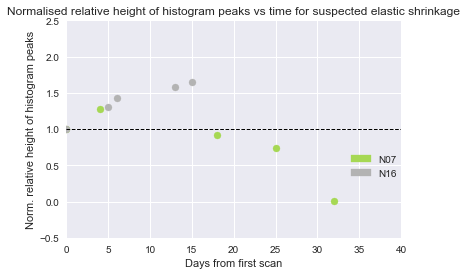

In [15]:
shrinkarray = [4,7]
erodearray = [2,3,5,6]
sns.set()
colourlist = sns.color_palette("Set2", 10)
ziplist = [list(i) for i in zip(colourlist,namearray)]
patcharray = [mpatches.Patch(color=colourlist[i], label=namearray[i]) for i in range(8)]
plt.subplots()
plt.xlim(0, 40)
plt.ylim(-0.5,2.5)
for k in shrinkarray:
    plt.scatter(x=np.array(anarray[k][0]),y=np.array(anarray[k][1]),color = colourlist[k])
xline = [list(np.linspace(0,40,40)), [1.0 for i in range(40)]]
plt.plot(xline[0], xline[1], linewidth=1, linestyle = '--',c='k')
plt.title("Normalised relative height of histogram peaks vs time for suspected elastic shrinkage")
plt.xlabel("Days from first scan")
plt.ylabel("Norm. relative height of histogram peaks")
#plt.title("Plot 1: Showing how relative heights of histogram peaks\n for tumour vs healthy lung change with time for 8 patients", 
#          fontsize=14)
patcharrayshrink = [patcharray[k] for k in shrinkarray]
plt.legend(handles=patcharrayshrink,bbox_to_anchor=(1,0.4),borderaxespad=0.)
plt.savefig("D:/mphysproject/willsmethodplotshrink.png",format='png',edgecolour='w')
plt.show()
plt.close()

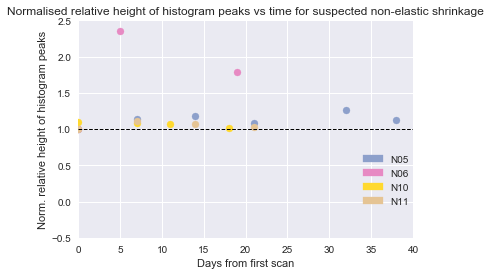

In [16]:
sns.set()
colourlist = sns.color_palette("Set2", 10)
ziplist = [list(i) for i in zip(colourlist,namearray)]
patcharray = [mpatches.Patch(color=colourlist[i], label=namearray[i]) for i in range(8)]
plt.subplots()
plt.xlim(0, 40)
plt.ylim(-0.5,2.5)
for k in erodearray:
    plt.scatter(x=np.array(anarray[k][0]),y=np.array(anarray[k][1]),color = colourlist[k])
xline = [list(np.linspace(0,40,40)), [1.0 for i in range(40)]]
plt.plot(xline[0], xline[1], linewidth=1, linestyle = '--',c='k')
plt.title("Normalised relative height of histogram peaks vs time for suspected non-elastic shrinkage")
plt.xlabel("Days from first scan")
plt.ylabel("Norm. relative height of histogram peaks")
#plt.title("Plot 1: Showing how relative heights of histogram peaks\n for tumour vs healthy lung change with time for 8 patients", 
#          fontsize=14)
patcharrayerode = [patcharray[k] for k in erodearray]
plt.legend(handles=patcharrayerode,bbox_to_anchor=(1,0.4),borderaxespad=0.)
plt.savefig("D:/mphysproject/willsmethodploterode.png",format='png',edgecolour='w')
plt.show()
plt.close()